> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No Show Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
### Introduction 

Health care is a critical factor in community production level. Access to healt care service to a population translates to a healthy population.Afordable health care can be provide but the greatest factor that determines the effectiveness is whether the community members show up for the services, This analysis try to report on factors contributing to show up or no-show up of patients after booking an appointment. 

### Dataset Description

The dataset used was taken from Kaggle. The dataset collects information from 100k medical appointments in Brazil collected in the month of May/June 2016. The dataset has 14 columns with a total records of 110,527. The columns are:

1. PatientId - Indicting a patient unique identity in the dataset	
2. AppointmentID - Appointment booking identity representing a single booking 
3. Gender - Show whether the patient is male (M) or Female (F)
4. ScheduledDay - Indicates the day an appointment was scheduled	
5. AppointmentDay - Indicates the day of appointment(When the patient is supposed to show up).	
6. Age - Age of the patient 
7. Neighbourhood - Where the patient lives.	
8. Scholarship 	- Whether the patient medical charges are sponsored or not 0 shows not sponsered while 1 indicates sponsered
9. Hipertension - Indicates whether the patient has Hippertension or not 	
10. Diabetes - Indicates whether the patient is diabetic or not
11. Alcoholism 	- Shows whether the patient is alcoholic or not 
12. Handcap - Indicates whether the patient is Handcaped or not	
13. SMS_received- Indicates whether the patient recieved a reminder SMS or not 	
14. No-show- Indicates whether the patient showed up or not with "Yes" indicating they didn't show up and "No" they showed up. 

In the analysis we use No-Show as the dependent valuable while other variable are independent. 

### Questions
1. How many patients showed up after booking appointment ? How many patients didn't show up after booking appointment?
2. Which age group booked the highest number of appointments ?
3. Does having a scholarship affect patient show up?
4. How does scholarship affect the show up rate?
5. Which neighbourhood had the highest attendance for the appointments ?


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [30]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0
!pip install -U seaborn

    100% |████████████████████████████████| 10.5MB 2.6MB/s eta 0:00:01   47% |███████████████                 | 4.9MB 24.7MB/s eta 0:00:01    58% |██████████████████▋             | 6.1MB 25.1MB/s eta 0:00:01    94% |██████████████████████████████▎ | 9.9MB 28.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.9MB/s eta 0:00:01  1% |▍                               | 184kB 26.4MB/s eta 0:00:01    9% |███▏                            | 1.3MB 24.6MB/s eta 0:00:01    18% |██████                          | 2.5MB 23.4MB/s eta 0:00:01    28% |█████████                       | 3.8MB 26.1MB/s eta 0:00:01    36% |███████████▌                    | 4.8MB 20.8MB/s eta 0:00:01    96% |███████████████████████████████ | 13.0MB 26.6MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pan

<a id='wrangling'></a>
## Data Wrangling





In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
dataframe = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
   
dataframe.head()

#   types and look for instances of missing or possibly errant data.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
dataframe.shape


(110527, 14)


### Data Cleaning


### Below cell we check for misisng data in our dataset. 

In [5]:
#check missing data 
dataframe.info()
dataframe.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

From the analysis above there are no missing data in our dataset. 

### We now check for duplicate date in our dataset


In [6]:
dataframe.duplicated().sum()

0

Our dataset do not have any duplicate records. 

### Converting Dates Columns (ScheduledDay,AppointmentDay) Values to the right format.

Conversion of these two columns will allow for arithmetic operations to get the appointement waiting period.

In [7]:
#converting date columns to dates data types 
def convert_to_date (dataFrameName,columnName):
    dataFrameName[columnName]= pd.to_datetime(dataFrameName[columnName])
convert_to_date(dataframe,'ScheduledDay')

In [8]:
convert_to_date(dataframe, 'AppointmentDay')


In [9]:
#confirm the SheduledDay and AppointmentDay data types have changed.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [10]:
#check for data with age below 0
dataframe.query('Age<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
#only one row has age below zero hence droping this row 
#would not cause significat change to our dataset
#Drop the row with negative age
dataframe.drop(index=(dataframe.loc[dataframe['Age']<0].index), inplace=True, axis=0)

In [12]:
# Confirm that the row with negative age value has been dropped
dataframe.query('Age<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


### Calculating  waiting time and adding a new column

In [13]:
dataframe['waiting_days']= (dataframe['AppointmentDay'] - dataframe['ScheduledDay']).dt.days
dataframe['waiting_days']= dataframe["waiting_days"].astype(int)
dataframe

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,-1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1


In [28]:
#calculating total records with negative waiting days 
dataframe.query('waiting_days < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,-1
19,7.223289e+12,5640433,F,2016-04-29 10:43:14,2016-04-29,46,DA PENHA,0,0,0,0,0,0,No,-1
24,8.734858e+12,5641780,F,2016-04-29 14:19:19,2016-04-29,65,TABUAZEIRO,0,0,0,0,0,0,No,-1
26,2.578785e+10,5641781,F,2016-04-29 14:19:42,2016-04-29,45,BENTO FERREIRA,0,1,0,0,0,0,No,-1
28,5.926172e+12,5642400,M,2016-04-29 15:48:02,2016-04-29,51,SÃO PEDRO,0,0,0,0,0,0,No,-1


In [14]:
#Droping data with negative waiting days
dataframe.drop(index=(dataframe.query('waiting_days < 0').index), axis=0, inplace=True)

In [15]:
#confirm records with negative waiting days have bee droped 
dataframe.query('waiting_days<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_days


In [47]:
# changing No-show data from Yes/No to 1/0
dataframe['No-show'].map(dict(Yes=1, No=0))

5         0
6         1
7         1
9         0
10        0
11        1
12        0
13        0
14        0
15        0
16        0
17        1
18        0
20        1
21        1
22        1
23        0
25        0
27        0
30        0
31        1
33        0
38        0
40        0
41        0
42        0
44        1
45        0
46        0
47        0
         ..
110451    0
110452    0
110461    1
110463    0
110466    0
110468    0
110469    1
110470    1
110476    0
110477    0
110478    0
110479    1
110480    0
110481    0
110482    1
110484    1
110485    0
110494    0
110496    1
110515    1
110516    1
110518    0
110519    0
110520    0
110521    0
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No-show, Length: 71959, dtype: int64

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 How many patients showed up after booking appointment ? How many patients didn't show up after booking appointment?


In [16]:
#Show the total patioent who showed up and those wo didn it show up. 
df_showup=dataframe['No-show'].value_counts()
df_showup

No     51437
Yes    20522
Name: No-show, dtype: int64

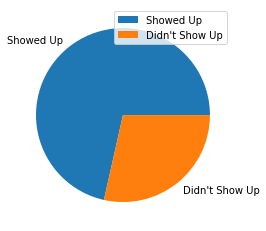

In [17]:
plt.pie(df_showup,labels=["Showed Up", "Didn't Show Up"]);
plt.legend()
plt.show()

A total of 88,208 patients booked appointment and showed up while a total of 22,319 booked appointment but didn't show up. 

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  Which age group booked the highest number of appointments ?


In [18]:
df_high=dataframe.groupby(dataframe['Age']).count()['No-show']
df_high

Age
0      2131
1      1084
2       717
3       809
4       750
       ... 
97        6
98        5
100       4
102       1
115       4
Name: No-show, Length: 102, dtype: int64

In [19]:
df_high.max()

2131

Patient with age of 0 booked the highest number of valid appointiments at 2131

Text(0, 0.5, 'Frequency')

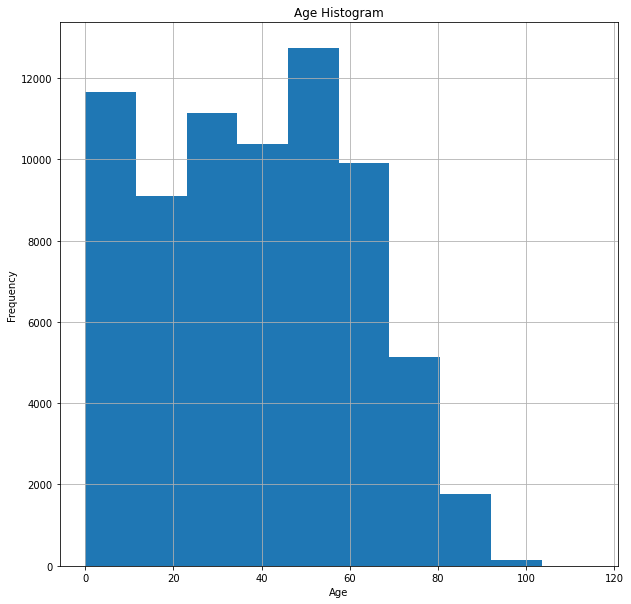

In [20]:
dataframe.Age.hist(figsize=(10,10));
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel('Frequency')

### Research Question 3: Which gender showed up for the  appointment than the other.

In [21]:
#computing the percentages of female and males who showed up and didn't show up
data_gendergrouped =(dataframe.groupby('Gender')['No-show'].value_counts())/len(dataframe)*100
data_gendergrouped

Gender  No-show
F       No         47.799441
        Yes        19.002488
M       No         23.681541
        Yes         9.516530
Name: No-show, dtype: float64

In [22]:
Female_showdup =data_gendergrouped["F"]['No']
Male_showdup = data_gendergrouped['M']['No']

Text(0,0.5,'Percentage Show Up')

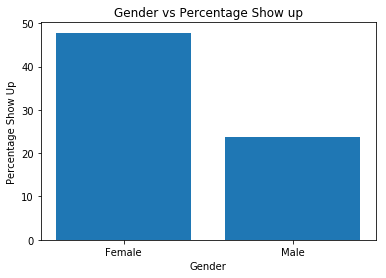

In [23]:
plt.bar(['Female', 'Male'], [Female_showdup, Male_showdup])
plt.title("Gender vs Percentage Show up")
plt.xlabel("Gender")
plt.ylabel("Percentage Show Up")

In [23]:
#Scholarship and show up
data_ScholarshipGrouped =(dataframe.groupby('Scholarship')['No-show'].value_counts())/len(dataframe)*100
data_ScholarshipGrouped

Scholarship  No-show
0            No         65.452549
             Yes        25.276894
1            No          6.028433
             Yes         3.242124
Name: No-show, dtype: float64

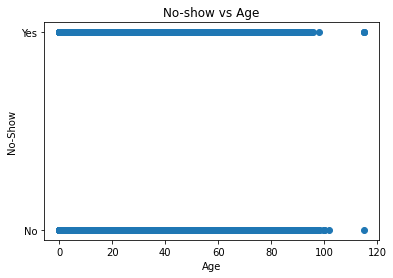

In [24]:
#Relationship between Age and No-show 
plt.scatter(data= dataframe, x="Age", y="No-show");
plt.title("No-show vs Age")
plt.xlabel('Age')
plt.ylabel("No-Show");

### What is the relationship between Age and Watings days ? 

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


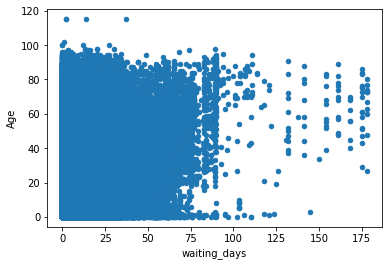

In [30]:
dataframe.plot(kind="scatter", x="waiting_days" , y= 'Age');

### Which neighbourhood had the highest attendance for the appointments ?

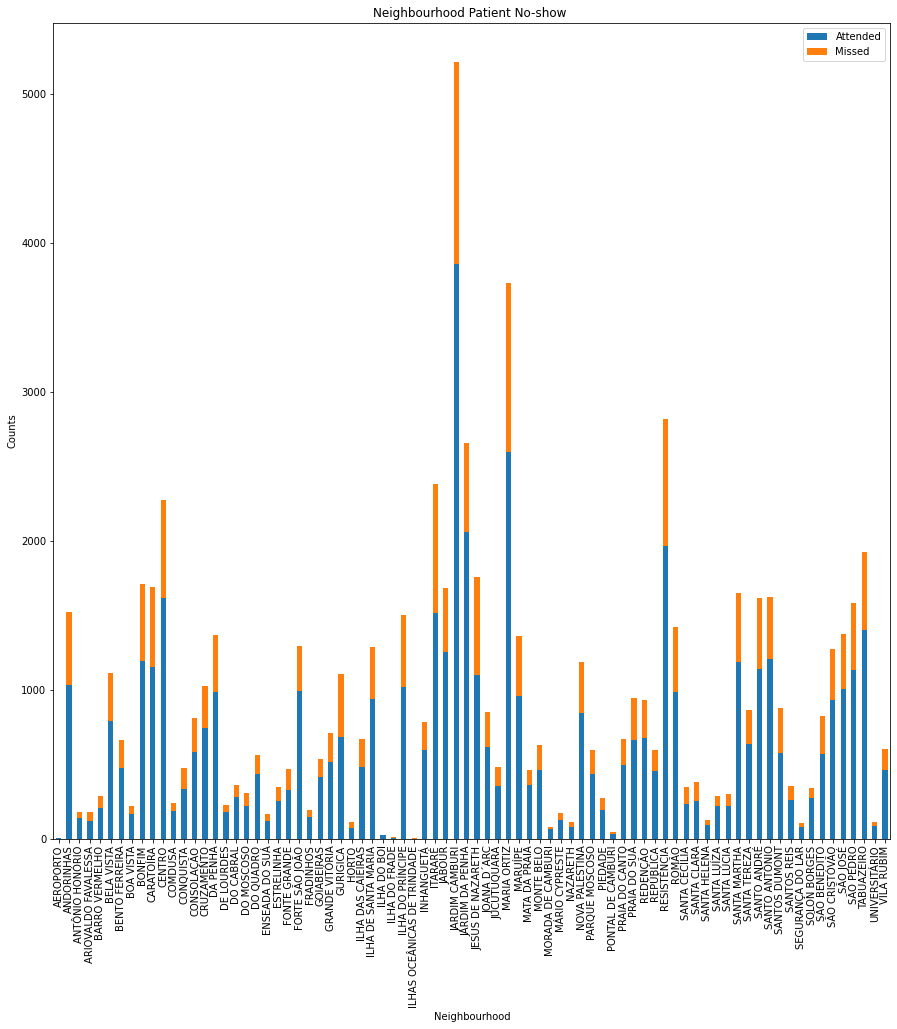

In [35]:
df_neighbourhood =dataframe.groupby('Neighbourhood')['No-show'].value_counts().unstack()

df_neighbourhood.plot(kind='bar', stacked=True, figsize=(15,15));
plt.title("Neighbourhood Patient No-show ")
plt.ylabel("Counts")
plt.xlabel("Neighbourhood")
plt.legend(['Attended', 'Missed']);

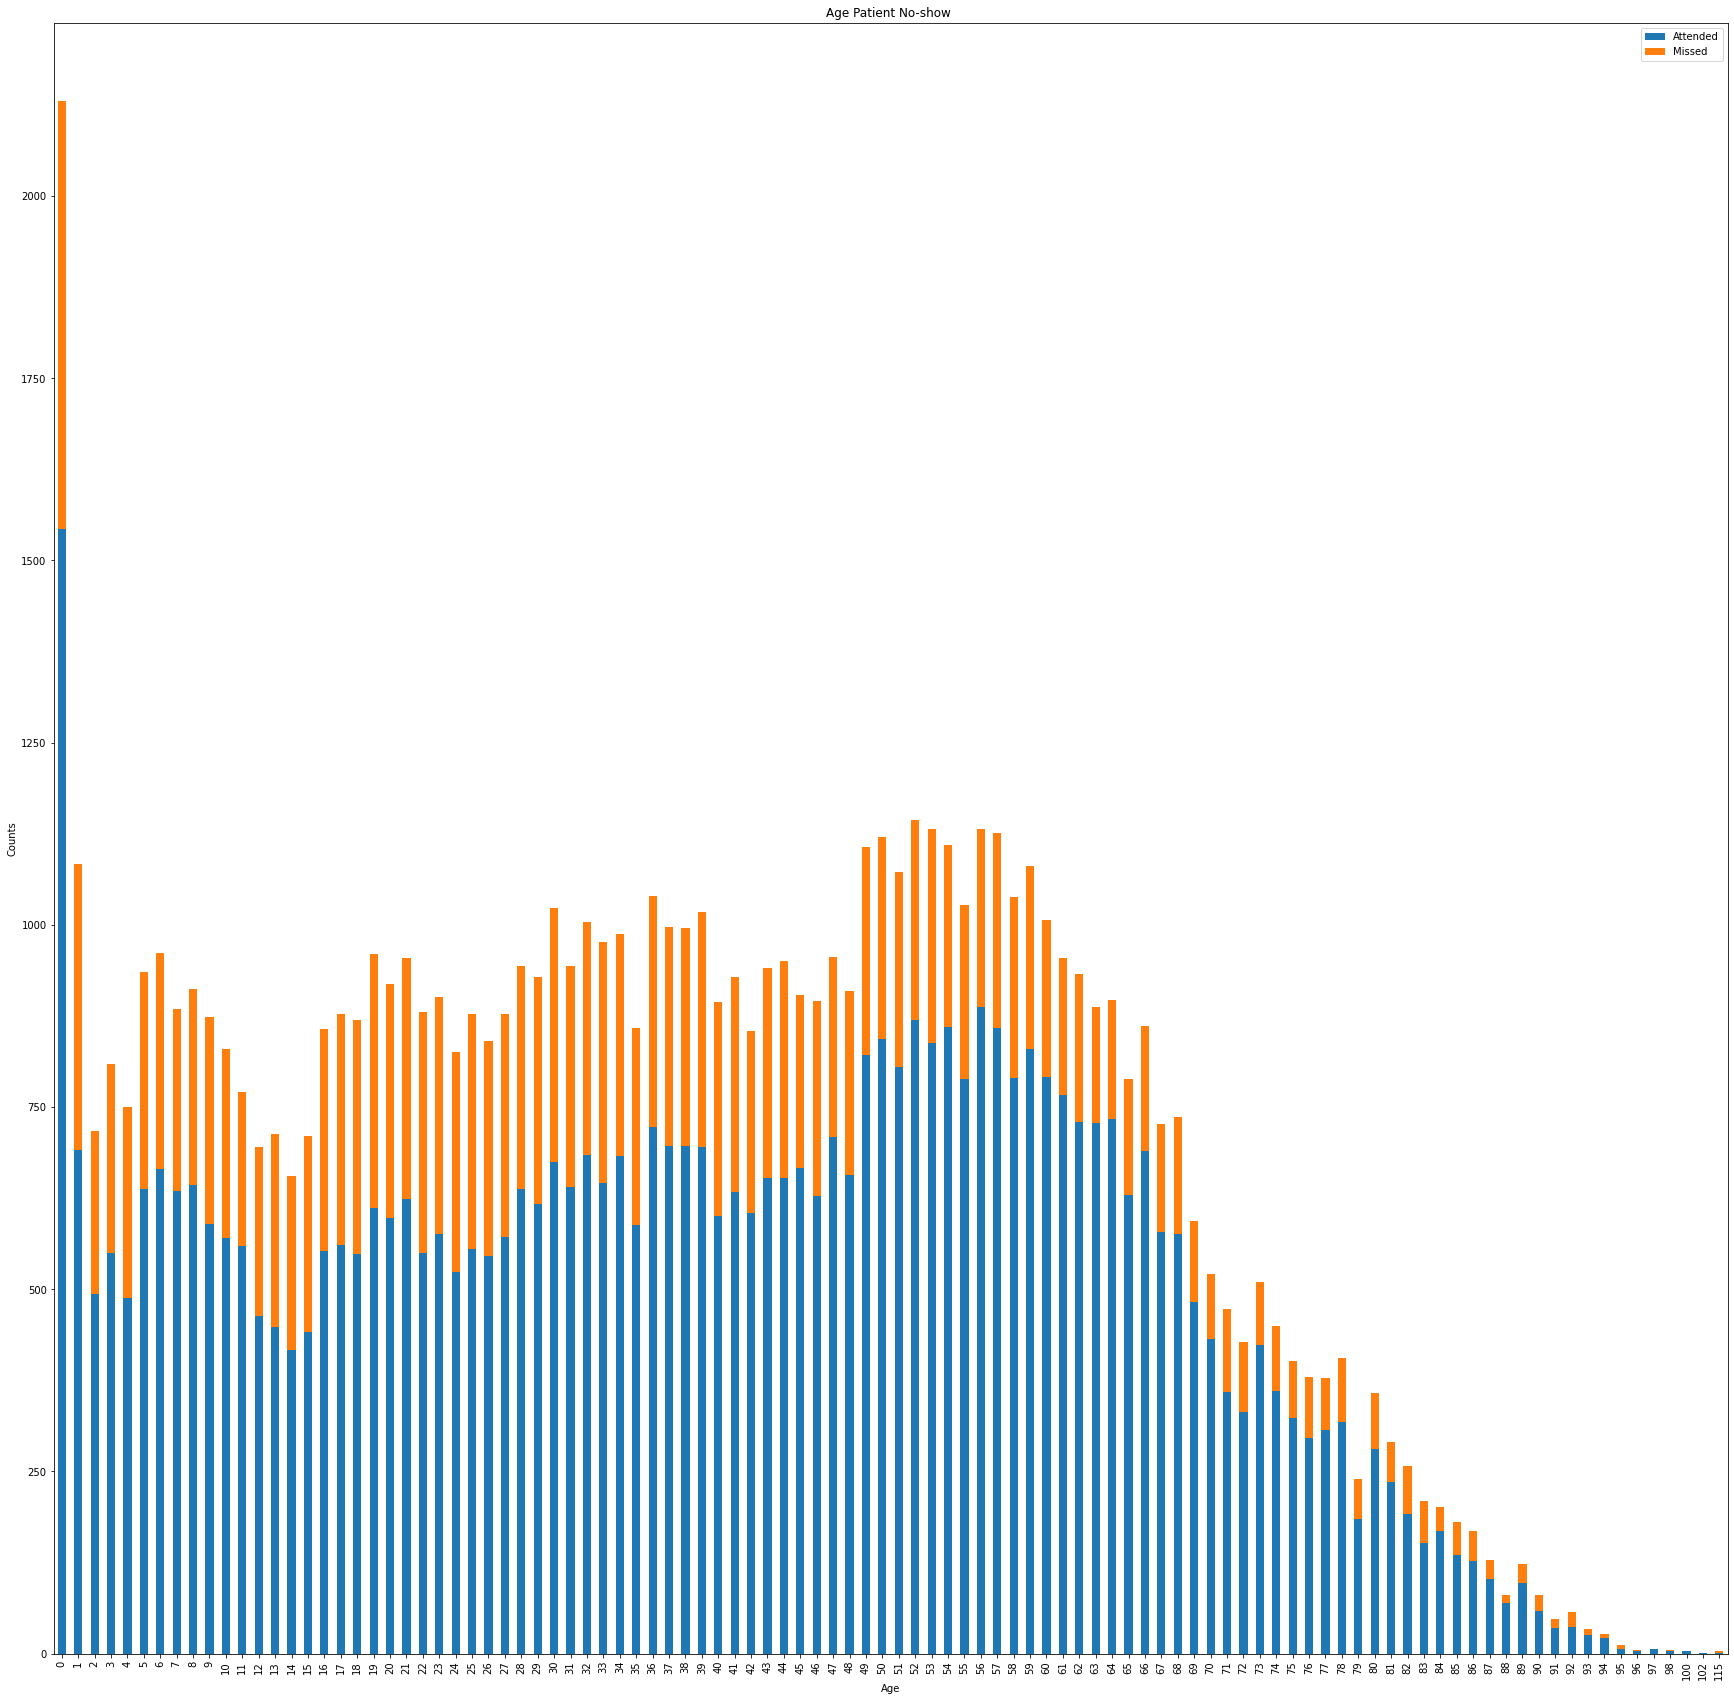

In [34]:
df_ageNoShow=dataframe.groupby('Age')['No-show'].value_counts().unstack()

df_ageNoShow.plot(kind='bar', stacked=True, figsize=(30,30))
plt.title("Age Patient No-show ")
plt.xlabel("Age")
plt.ylabel("Counts")
plt.legend(['Attended', 'Missed']);

<a id='conclusions'></a>
## Conclusions

1. The total number of those who showed up for appointments is greater than those who didn't. More people are keen on thier health in this community
2. Age group 0 booked more appointments than all the other age groups. The community is more keen on the health of their young onces
3. More females showed up for their appointemt than males. Female are more keen on their health than the Male gender
4. 65 % of the people showed up without scholarship hence the cost of health care is affordable 
5. JARDIM CAMBURI had a high number of booked appointment and attended appointment. The dataset is limited for detereming the factors contributing to the high rate of attendace.
6. Pateint Age directly determine the ability of show up

Limitation
 1. Neighbourhood distiance from the health facility would add value to the analysis of how neighbourhood no-show data align. We would determine how distance affect the attendance. 

